In [22]:
import os
os.environ["OMP_NUM_Threads"] = "1"

from sklearn import metrics
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

In [23]:
x1 = np.array([3, 1, 1, 2, 1, 6, 6, 6, 5, 6, 7, 8, 9, 8, 9, 9, 8])
x2 = np.array([5, 4, 5, 6, 5, 8, 6, 7, 6, 7, 1, 2, 1, 2, 3, 2, 3])
X = np.array(list(zip(x1,x2)))


In [27]:
distortions=[]
inertias=[]
map1={}
map2={}

K=range(1,10)
for k in K:
    KMeansModel = KMeans(n_clusters=k).fit(X)
    
    distortions.append(sum(np.min(cdist(X,KMeansModel.cluster_centers_,'euclidean'), axis=1,))/X.shape[0])
    inertias.append(KMeansModel.inertia_)
    map1[k] = sum(np.min(cdist(X,KMeansModel.cluster_centers_,'euclidean'),axis=1))/X.shape[0]
    map2[k]= KMeansModel.inertia_

    

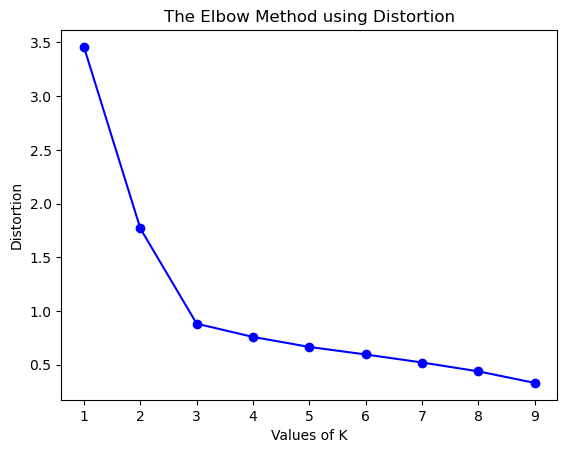

In [28]:
plt.plot(K, distortions, 'bo-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

Final cluster assignment for each data point:
[0 0 0 0 0 2 2 2 2 2 1 1 1 1 1 1 1]


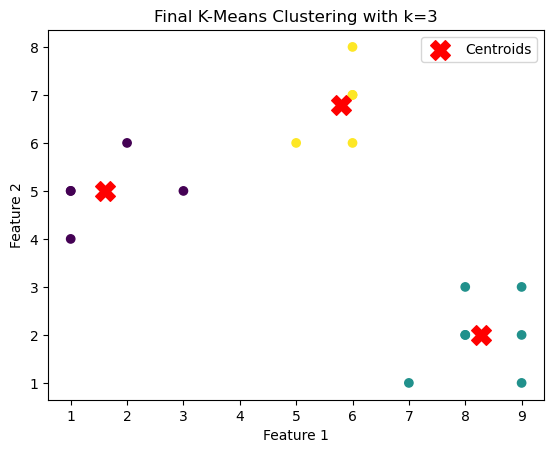

In [29]:
optimal_k = 3
final_model = KMeans(n_clusters=optimal_k, n_init='auto').fit(X)

cluster_assignments = final_model.labels_

print("Final cluster assignment for each data point:")
print(cluster_assignments)

plt.scatter(X[:, 0], X[:, 1], c=cluster_assignments, cmap='viridis')
plt.scatter(final_model.cluster_centers_[:, 0], final_model.cluster_centers_[:, 1], c='red', s=200, marker='X', label='Centroids')
plt.title(f'Final K-Means Clustering with k={optimal_k}')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

(train_images,train_labels),(test_images,test_labels)=keras.datasets.cifar10.load_data()
train_images,test_images = train_images/255.0,test_images/255.0


In [6]:
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(32,32,3)),
    layers.Conv2D(32, (3,3),activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3),activation = 'relu'),
    layers.Flatten(),
    layers.Dense(64,activation = 'relu'),
    layers.Dense(10)])

model.compile(optimizer='adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics = ['accuracy'])

print("Starting model training...")
history = model.fit(train_images,train_labels,epochs=10,
                   validation_data = (test_images,test_labels))

print("\mTraining finished")

Starting model training...
Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.4947 - loss: 1.4121 - val_accuracy: 0.6108 - val_loss: 1.1285
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.6334 - loss: 1.0519 - val_accuracy: 0.6542 - val_loss: 1.0026
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.6838 - loss: 0.9086 - val_accuracy: 0.6670 - val_loss: 0.9619
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7178 - loss: 0.8078 - val_accuracy: 0.6786 - val_loss: 0.9419
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.7475 - loss: 0.7245 - val_accuracy: 0.6788 - val_loss: 0.9572
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7734 - loss: 0.6496 - val_accuracy: 0.6814 - val_loss: 0.9522
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.8021 - loss: 0.5698 - val_accuracy: 0.6782 - val_loss: 0.9746
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step -